# Scaling Data Using RobustScaler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.preprocessing import StandardScaler, scale, RobustScaler, robust_scale

In [44]:
toy_df = pd.DataFrame({
    
    "Name" : ["Dennis", "Greg", "Susie", "Lauren", "Harry"],
    "Occupation" : ["Doctor", "Lawyer", "Teacher", "Mechanic", "Waiter"],
    "Age" : [30, 32, 35, 38, 25]
    
})

toy_df

,Name,Occupation,Age
0,Dennis,Doctor,30
1,Greg,Lawyer,32
2,Susie,Teacher,35
3,Lauren,Mechanic,38
4,Harry,Waiter,25


In [29]:
toy_df.describe()

,Age
count,5.000000
mean,32.000000
std,4.949747
min,25.000000
25%,30.000000
50%,32.000000
75%,35.000000
max,38.000000


In [30]:
toy_df["Age"] = toy_df["Age"].astype(np.float32)

toy_df["Scaled_Age"] = scale(toy_df["Age"])

toy_df

,Name,Occupation,Age,Scaled_Age
0,Dennis,Doctor,30.0,-0.451754
1,Greg,Lawyer,32.0,0.000000
2,Susie,Teacher,35.0,0.677631
3,Lauren,Mechanic,38.0,1.355262
4,Harry,Waiter,25.0,-1.581139


### Manually calculate the robust scaled values

In [31]:
def robust_scale_manual(x, median, q25, q75):
    
    scaled = (x - median) / (q75 - q25)
    
    return scaled

In [32]:
median = toy_df["Age"].median()

q25 = toy_df["Age"].quantile(q = 0.25)

q75 = toy_df["Age"].quantile(q = 0.75)

In [33]:
toy_df['Robust_Scaled_Age'] = toy_df['Age']. \
    apply(lambda x : robust_scale_manual(x, median, q25, q75))

toy_df

,Name,Occupation,Age,Scaled_Age,Robust_Scaled_Age
0,Dennis,Doctor,30.0,-0.451754,-0.4
1,Greg,Lawyer,32.0,0.000000,0.0
2,Susie,Teacher,35.0,0.677631,0.6
3,Lauren,Mechanic,38.0,1.355262,1.2
4,Harry,Waiter,25.0,-1.581139,-1.4


### Append a new value which is much larger than other values in the data

In [36]:
new_df = pd.DataFrame({
    
    "Name" : ["John"],
    "Occupation" : ["Retired"],
    "Age" : [85]
    
})

new_df

,Name,Occupation,Age
0,John,Retired,85


### The mean is very sensitive to the presence of outliers

- Observe that the mean has changed from ~32 to almost ~40
- The median has only moved a little, from ~32 to ~33

In [60]:
toy_df = toy_df.append(new_df, sort = False)

toy_df["Scaled_Age"] = scale(toy_df["Age"])

toy_df[["Age"]].describe()

,Age
count,7.000000
mean,47.142857
std,26.175234
min,25.000000
25%,31.000000
50%,35.000000
75%,61.500000
max,85.000000


In [61]:
median = toy_df["Age"].median()

q25 = toy_df["Age"].quantile(q = 0.25)

q75 = toy_df["Age"].quantile(q = 0.75)

toy_df['Robust_Scaled_Age'] = toy_df['Age']. \
    apply(lambda x : robust_scale_manual(x, median, q25, q75))

In [62]:
toy_df

,Name,Occupation,Age,Scaled_Age,Robust_Scaled_Age
0,Dennis,Doctor,30,-0.707402,-0.163934
1,Greg,Lawyer,32,-0.624871,-0.098361
2,Susie,Teacher,35,-0.501076,0.000000
3,Lauren,Mechanic,38,-0.377281,0.098361
4,Harry,Waiter,25,-0.913727,-0.327869
0,John,Retired,85,1.562179,1.639344
0,John,Retired,85,1.562179,1.639344


In [66]:
real_estate_data = pd.read_csv("datasets/real_estate_data_outliers.csv")

real_estate_data.describe()

,house_age,Distance_to_MRT_Station,no_of_convenient_stores,house_price
count,414.000000,414.000000,414.000000,414.000000
mean,18.010797,1317.721417,4.685411,39.596958
std,11.577065,3353.889582,6.463112,29.531770
min,0.000000,23.382840,0.000000,7.600000
25%,9.250000,289.324800,1.000000,28.175000
50%,16.200000,492.231300,4.000000,38.850000
75%,28.992500,1487.175250,6.000000,46.775000
max,50.500000,54334.544300,78.400000,568.160000


In [68]:
real_estate_data[real_estate_data['house_age'] > 42]

,house_age,Distance_to_MRT_Station,no_of_convenient_stores,house_price
8,45.3,5512.03800,1.0,100.435
38,50.5,577.96150,6.0,47.700
192,43.8,57.58945,7.0,42.700
392,42.7,443.80200,6.0,35.300


In [69]:
scaled_df = pd.DataFrame(scale(real_estate_data), columns = real_estate_data.columns)

scaled_df.head(5)

,house_age,Distance_to_MRT_Station,no_of_convenient_stores,house_price
0,1.209817,-0.368031,0.823291,-0.057532
1,0.128790,-0.301844,0.668379,0.088250
2,-0.407400,-0.225604,6.291664,0.261155
3,-0.407400,-0.225604,0.048733,0.515426
4,1.036853,-0.276776,0.048733,0.118763


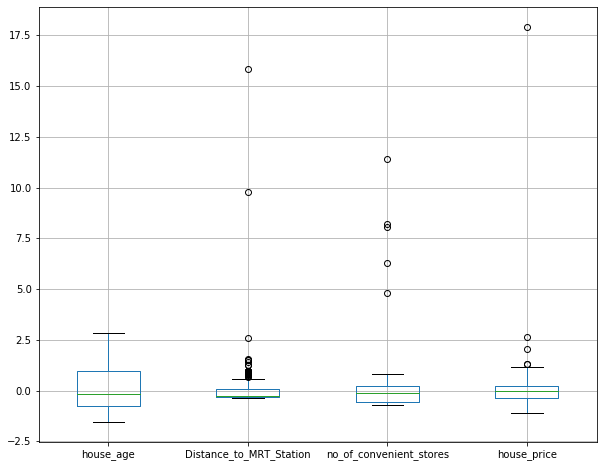

In [70]:
scaled_df.boxplot(figsize = (10, 8))

plt.show()

In [71]:
scaled_df["robust_house_age"] = robust_scale(scaled_df["house_age"])

### Compare the interquartile range of values

- for the standardized data it is a larger range than the robust scaled data
- the robust scaler is likely to flag many more outliers

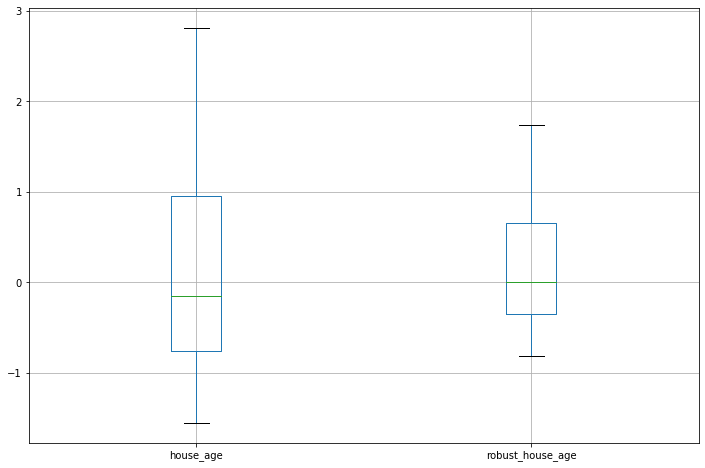

In [72]:
scaled_df.boxplot(column = ["house_age", "robust_house_age"], figsize = (12, 8))

plt.show()

In [73]:
robust_scaler = RobustScaler(copy = True, with_centering = True, with_scaling = True)

robust_scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

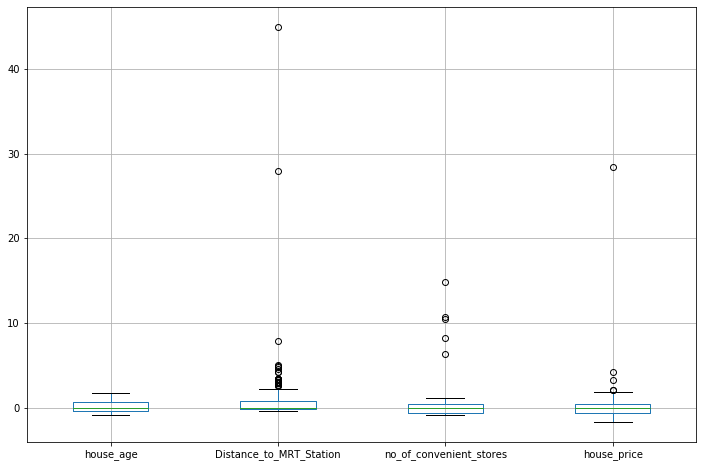

In [74]:
robust_scaled_array = robust_scaler.fit_transform(real_estate_data)

robust_scaled_df = pd.DataFrame(robust_scaled_array, columns = real_estate_data.columns)

robust_scaled_df.boxplot(figsize = (12, 8))

plt.show()